- Divida o conjunto de dados em conjuntos de treinamento e teste
- Crie o modelo de Árvore de Decisão
- Treine o modelo de Árvore de Decisão
- Faça previsões no conjunto de teste
- Avalie a Matriz de Confusão do modelo de Árvore de Decisão
- Imprima a Árvore de Decisão criada
- Vale a pena mudar algum parâmetro da árvore para obter melhores resultados?
- Experimente Modelos de Bagging. Boost e Stacking e compare seus desempenhos com o modelo de árvore, sugerido inicialmente

In [23]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import export_text

In [24]:
mnist = fetch_openml('mnist_784')

In [25]:
x = mnist.data
y = mnist.target

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,
y, test_size = 0.2, random_state = 0)

In [27]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

### Matriz de confusão

In [28]:

# Avalie a precisão do modelo de Árvore de Decisão
accuracy = accuracy_score(y_test, y_pred)
print("Precisão do modelo de Árvore de Decisão:", accuracy)
class_names = sorted(list(mnist.target.unique()))
print(class_names)

Precisão do modelo de Árvore de Decisão: 0.8674285714285714
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1387
           1       0.94      0.96      0.95      1580
           2       0.85      0.84      0.85      1443
           3       0.86      0.82      0.84      1435
           4       0.86      0.88      0.87      1350
           5       0.84      0.82      0.83      1231
           6       0.88      0.89      0.89      1387
           7       0.89      0.89      0.89      1458
           8       0.81      0.80      0.80      1368
           9       0.82      0.84      0.83      1361

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



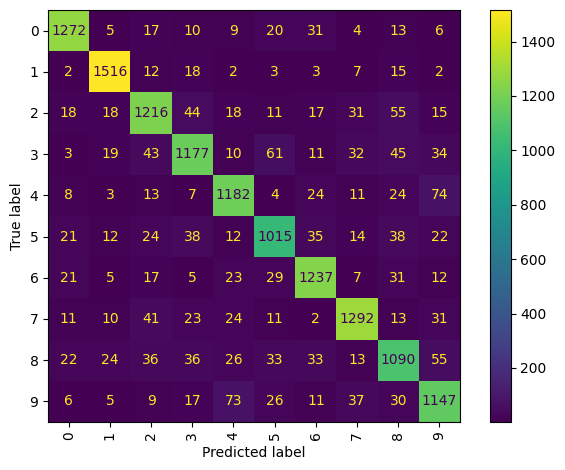

In [29]:
print(classification_report(y_test, y_pred, target_names=class_names))
ConfusionMatrixDisplay.from_estimator(
    classifier, x_test, y_test, display_labels= class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [32]:
tree_rules = export_text(classifier, feature_names=mnist['feature_names'])
print(tree_rules)

|--- pixel351 <= 125.50
|   |--- pixel569 <= 0.50
|   |   |--- pixel431 <= 0.50
|   |   |   |--- pixel406 <= 2.50
|   |   |   |   |--- pixel486 <= 7.00
|   |   |   |   |   |--- pixel155 <= 1.00
|   |   |   |   |   |   |--- pixel595 <= 2.50
|   |   |   |   |   |   |   |--- pixel157 <= 0.50
|   |   |   |   |   |   |   |   |--- pixel583 <= 52.00
|   |   |   |   |   |   |   |   |   |--- pixel153 <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- pixel501 <= 14.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 35
|   |   |   |   |   |   |   |   |   |   |--- pixel501 >  14.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- pixel153 >  8.50
|   |   |   |   |   |   |   |   |   |   |--- pixel605 <= 196.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- pixel605 >  196.50
|   |   |   |   |   |   |   |   |   |   |   |--- clas